## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import os
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)
type(mouse_metadata)
mouse_metadata.sort_values("Mouse ID", inplace = True) 
mouse_metadata.drop_duplicates(subset ="Mouse ID", keep= False, inplace = True) 
# Combine the data into a single dataset
drug_analysis_df=pd.merge(mouse_metadata,study_results,how="left",on=["Mouse ID"])

# Display the data table for preview
drug_analysis_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,a203,Infubinol,Female,20,23,0,45.000000,0
1,a203,Infubinol,Female,20,23,5,48.508468,0
2,a203,Infubinol,Female,20,23,10,51.852437,1
3,a203,Infubinol,Female,20,23,15,52.777870,1
4,a203,Infubinol,Female,20,23,20,55.173336,1


In [2]:
# Checking the number of mice.
Number_of_Mice= len(mouse_metadata["Mouse ID"])

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_MiceID=drug_analysis_df[drug_analysis_df.duplicated(["Mouse ID", "Timepoint"])]
duplicate_MiceID

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
587,g989,Propriva,Female,21,26,0,45.000000,0
589,g989,Propriva,Female,21,26,5,47.570392,0
591,g989,Propriva,Female,21,26,10,49.880528,0
593,g989,Propriva,Female,21,26,15,53.442020,0
595,g989,Propriva,Female,21,26,20,54.657650,1


In [4]:
# Optional: Get all the data for the duplicate mouse ID.
duplicate_MiceID=duplicate_MiceID.drop_duplicates()
duplicate_MiceID

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
587,g989,Propriva,Female,21,26,0,45.000000,0
589,g989,Propriva,Female,21,26,5,47.570392,0
591,g989,Propriva,Female,21,26,10,49.880528,0
593,g989,Propriva,Female,21,26,15,53.442020,0
595,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
Clean_Mouse_ID=drug_analysis_df.loc[drug_analysis_df["Mouse ID"] != "g989"]
Clean_Mouse_ID= pd.DataFrame(Clean_Mouse_ID)
Clean_Mouse_ID.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,a203,Infubinol,Female,20,23,0,45.000000,0
1,a203,Infubinol,Female,20,23,5,48.508468,0
2,a203,Infubinol,Female,20,23,10,51.852437,1
3,a203,Infubinol,Female,20,23,15,52.777870,1
4,a203,Infubinol,Female,20,23,20,55.173336,1


In [6]:
# Checking the number of mice in the clean DataFrame.
Clean_Mouse_ID["Mouse ID"].value_counts()

i901    10
y793    10
r944    10
r554    10
s337    10
        ..
d133     1
o848     1
u153     1
v199     1
n482     1
Name: Mouse ID, Length: 248, dtype: int64

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
Clean_Mouse_ID
# This method is the most straighforward, creating multiple series and putting them all together at the end.



,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,a203,Infubinol,Female,20,23,0,45.000000,0
1,a203,Infubinol,Female,20,23,5,48.508468,0
2,a203,Infubinol,Female,20,23,10,51.852437,1
3,a203,Infubinol,Female,20,23,15,52.777870,1
4,a203,Infubinol,Female,20,23,20,55.173336,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [43]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
Tumor_Volume_by_Regimen=Clean_Mouse_ID[["Drug Regimen", "Tumor Volume (mm3)"]]
# This method produces everything in a single groupby function
tumor_stats_df=Tumor_Volume_by_Regimen.groupby(["Drug Regimen"])
tumor_stats_mean=tumor_stats_df.mean()
tumor_stats_std=tumor_stats_df.std()
tumor_stats_median=tumor_stats_df.median()
tumor_stats_var=tumor_stats_df.var()
tumor_stats_sem=tumor_stats_df.sem()
tumor_stats_final=[{"Tumor Volume Mean": tumor_stats_mean,"Tumor Volume Std": tumor_stats_std,
                  "Tumor Volume Median": tumor_stats_median,
                  "Tumor Volume Variance": tumor_stats_var,
                  "Tumor Volume Sem": tumor_stats_sem}]
tumor_stats_final

[{'Tumor Volume Mean':               Tumor Volume (mm3)
  Drug Regimen                    
  Capomulin              40.675741
  Ceftamin               52.591172
  Infubinol              52.884795
  Ketapril               55.235638
  Naftisol               54.331565
  Placebo                54.033581
  Propriva               52.320930
  Ramicane               40.216745
  Stelasyn               54.233149
  Zoniferol              53.236507,
  'Tumor Volume Std':               Tumor Volume (mm3)
  Drug Regimen                    
  Capomulin               4.994774
  Ceftamin                6.268188
  Infubinol               6.567243
  Ketapril                8.279709
  Naftisol                8.134708
  Placebo                 7.821003
  Propriva                6.622085
  Ramicane                4.846308
  Stelasyn                7.710419
  Zoniferol               6.966589,
  'Tumor Volume Median':               Tumor Volume (mm3)
  Drug Regimen                    
  Capomulin             

## Bar and Pie Charts

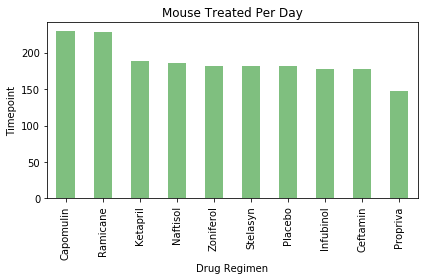

In [9]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 

mice_per_treatment=Clean_Mouse_ID.groupby(["Drug Regimen"]).count()["Mouse ID"]
mice_per_treatment=mice_per_treatment.sort_values(ascending=False)
mice_per_treatment.plot(kind="bar",color="green",alpha=0.5)

plt.title("Mouse Treated Per Day")
plt.ylabel("Timepoint")
plt.tight_layout()
plt.show()



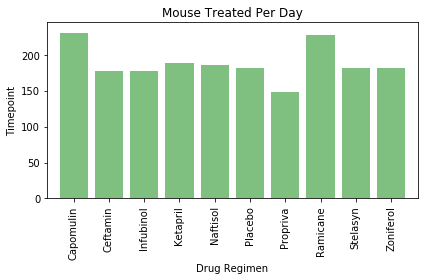

In [10]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
Treatment=["Capomulin", "Ceftamin", "Infubinol", "Ketapril", "Naftisol", "Placebo", "Propriva", "Ramicane", "Stelasyn", "Zoniferol"]
Num_days=[230,178,178,188,186,181,148,228,181,182]

Treatment=np.arange(len(mice_per_treatment))
Ticks=[]
for i in Treatment:
       Ticks.append(i)
plt.title("Mouse Treated Per Day")
plt.xlabel("Drug Regimen")
plt.ylabel("Timepoint")

plt.xlim(-0.75, len(Treatment)-0.25)
plt.ylim(0, max(Num_days) + 15)

plt.bar(Treatment,Num_days, facecolor="Green", alpha=0.5,align="center")
plt.xticks(Ticks, ["Capomulin", "Ceftamin", "Infubinol", "Ketapril", "Naftisol", "Placebo", "Propriva", "Ramicane", "Stelasyn", "Zoniferol"], rotation='vertical')
plt.tight_layout()
plt.show()

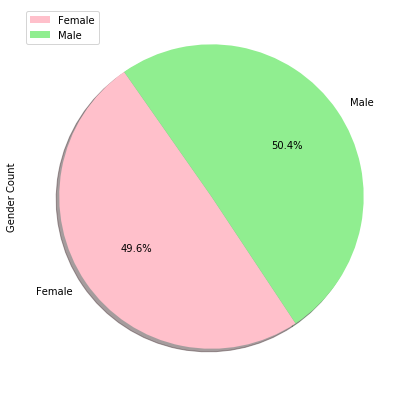

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
Gender_distrib=Clean_Mouse_ID.groupby(["Sex", "Mouse ID"]).size()
Gender_distrib=pd.DataFrame(Gender_distrib.groupby(["Sex"]).count())
Gender_distrib.columns=["Gender Count"]
Labels=["Female","Male"]
Colors=["pink","lightgreen"]
plot=Gender_distrib.plot.pie(y="Gender Count",figsize=(7,7),labels=Labels,colors=Colors,autopct="%1.1f%%",shadow=True,startangle=125)
plt.show()

Text(0, 0.5, 'Gender Count')

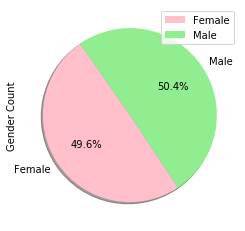

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
Labels=["Female","Male"]
Colors=["pink","lightgreen"]
plt.pie([49.6,50.4],labels=Labels,colors=Colors,autopct="%1.1f%%",shadow=True,startangle=125)
plt.legend(loc="best")
plt.ylabel("Gender Count")

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
Tumor_4_Regimens = Clean_Mouse_ID[Clean_Mouse_ID["Drug Regimen"].isin(["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])]
Tumor_4_Regimens = Tumor_4_Regimens.sort_values(["Timepoint"], ascending=True)
Tumor_4_Regimens_DF = Tumor_4_Regimens[["Drug Regimen", "Mouse ID", "Tumor Volume (mm3)"]]
Tumor_4_Regimens_DF = pd.DataFrame(Tumor_4_Regimens_DF)
Tumor_4_Regimens_DF.reset_index()



,index,Drug Regimen,Mouse ID,Tumor Volume (mm3)
0,0,Infubinol,a203,45.000000
1,207,Capomulin,b742,45.000000
2,1578,Infubinol,v766,45.000000
3,1251,Ramicane,q597,45.000000
4,191,Ceftamin,b487,45.000000
...,...,...,...,...
809,1339,Ramicane,r811,37.225650
810,433,Infubinol,e476,62.435404
811,1749,Ceftamin,x581,64.634949
812,1021,Capomulin,m957,33.329098


Ceftamin outliers:30      45.000000
31      46.795257
32      47.371343
33      49.734404
34      50.513437
          ...    
1841    57.173538
1842    59.033275
1843    61.153140
1844    63.469549
1845    64.729837
Name: Tumor Volume (mm3), Length: 178, dtype: float64
Infubinol outliers:0       45.000000
1       48.508468
2       51.852437
3       52.777870
4       55.173336
          ...    
1868    54.316407
1869    56.286750
1870    58.628399
1871    60.053740
1872    62.754451
Name: Tumor Volume (mm3), Length: 177, dtype: float64
Ramicane outliers:57      45.000000
58      45.466677
59      40.759788
60      41.484169
61      38.087373
          ...    
1857    36.890016
1858    37.414114
1859    37.815935
1860    38.504824
1861    34.022093
Name: Tumor Volume (mm3), Length: 216, dtype: float64
Capomulin outliers:174     45.000000
175     45.651331
176     43.270852
177     43.784893
178     42.731552
          ...    
1829    42.283665
1830    40.716428
1831    38.992734
1832    

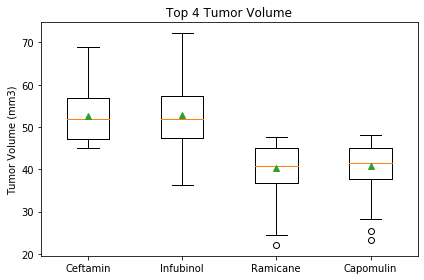

In [36]:
# Put treatments into a list for for loop (and later for plot labels)
Treatments=["Ceftamin","Infubinol","Ramicane","Capomulin"]
# Create empty list to fill with tumor vol data (for plotting)
tumor_volume_data=[]
for T in Treatments: 
    tumor_volume_data_df=Clean_Mouse_ID.loc[Clean_Mouse_ID["Drug Regimen"]==T,"Tumor Volume (mm3)"]
    tumor_volume_data.append(tumor_volume_data_df)
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    quantlies=tumor_volume_data_df.quantile([.25,.5,.75])
    lowerquantile=quantlies[0.25]
    upperquantile=quantlies[0.75]
    IQR=upperquantile-lowerquantile
    lowerbound=lowerquantile-(1.5*IQR)
    upperbound=upperquantile-(1.5*IQR)
    outliers=tumor_volume_data_df.loc[(tumor_volume_data_df<lowerbound)|(tumor_volume_data_df>upperbound)]
    print(f"{T} outliers:{outliers}")

plt.boxplot(tumor_volume_data,labels=Treatments,showmeans=True)
plt.title("Top 4 Tumor Volume")
plt.ylabel("Tumor Volume (mm3)")
plt.tight_layout()
    

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

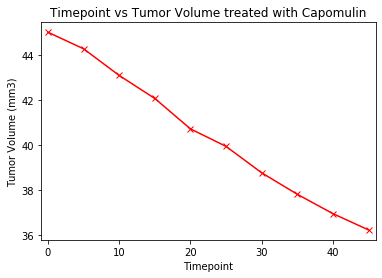

In [109]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
Timepoint_vs_Tumor = Clean_Mouse_ID.loc[:, ["Mouse ID", "Drug Regimen", "Timepoint", "Tumor Volume (mm3)"]]
Timepoint_vs_Tumor= Timepoint_vs_Tumor.loc[Timepoint_vs_Tumor["Drug Regimen"]=="Capomulin"]
Timepoint_vs_Tumor = Timepoint_vs_Tumor.groupby("Timepoint").mean()
Timepoint_vs_Tumor.head()

plt.plot(Timepoint_vs_Tumor, color="red", marker="x")
plt.xlim(-1,46)
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Timepoint vs Tumor Volume treated with Capomulin")
plt.show()


The correlations is: 0.84


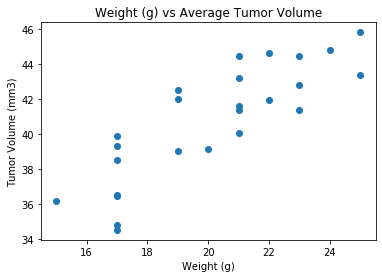

In [131]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
Timepoint_vs_Tumor = Clean_Mouse_ID.loc[:, ["Mouse ID", "Drug Regimen", "Timepoint","Weight (g)", "Tumor Volume (mm3)"]]
Timepoint_vs_Tumor= Timepoint_vs_Tumor.loc[Timepoint_vs_Tumor["Drug Regimen"]=="Capomulin"]
Timepoint_vs_Tumor = Timepoint_vs_Tumor.groupby("Mouse ID").mean()
Timepoint_vs_Tumor

x = Timepoint_vs_Tumor["Weight (g)"]
y= Timepoint_vs_Tumor["Tumor Volume (mm3)"]

plt.scatter(x, y)
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Weight (g) vs Average Tumor Volume")
correlation = st.pearsonr(x, y)
print(f"The correlations is: {round(correlation[0],2)}")

plt.show()

## Correlation and Regression

The correlation for both factors is: 0.84
The r-squared value is: 0.71


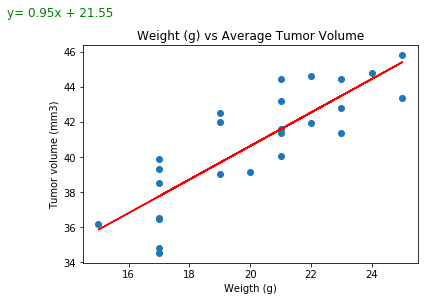

In [132]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
x = Timepoint_vs_Tumor["Weight (g)"]
y = Timepoint_vs_Tumor["Tumor Volume (mm3)"]
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x, y)
regress_values = x * slope + intercept
Equation = "y= " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x, y)
plt.plot(x, regress_values, "r")
plt.text(12,48,Equation,color="green", fontsize=12)
plt.xlabel("Weigth (g)")
plt.ylabel("Tumor volume (mm3)")
plt.title("Weight (g) vs Average Tumor Volume")
rsquared = rvalue**2
print(f"The correlation for both factors is: {round(rvalue,2)}")
print(f"The r-squared value is: {round(rsquared,2)}")
plt.show()